# ECS7020P mini-project submission

The mini-project has two separate components:


1.   **Basic component** [6 marks]: Using the MLEnd Yummy Dataset, build a machine learning pipeline that takes as an input a photo of a dish that has either rice or chips and predicts whether the picture has rice or chips.
2.   **Advanced component** [10 marks]: Formulate your own machine learning problem and build a machine learning solution using the MLEnd Yummy Dataset.

**Submit two Jupyter notebooks**, one for the basic component and another one for advanced component. Please **name each notebook**:

* ECS7020P_miniproject_basic.ipynb
* ECS7020P_miniproject_advanced.ipynb

then **zip and submit them toghether**.

Each uploaded notebook should include:

*   **Text cells**, describing concisely each step and results.
*   **Code cells**, implementing each step.
*   **Output cells**, i.e. the output from each code cell.

and **should have the structure** (9 sections) indicated below. Notebooks might not be run, please make sure that the **output cells are saved**.

How will we evaluate your submission?

*   Conciseness in your writing.
*   Correctness in your methodology.
*   Correctness in your analysis and conclusions.
*   Completeness.
*   Originality and efforts to try something new.

Suggestion: Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience.

Each notebook should be structured into the following 9 sections:


# 1 Author

**Student Name**:  Addalin Lariena Rose Devasahaya Rajan

**Student ID**:  230187746



# 2 Problem formulation

The machine learning problem I want to solve is to predict wheather a list of ingredients of a particular dish is gluten-free or not. What is interesting about this problem is that since gluten is present in many items such as bread, chapatti, wraps etc, I wanted to see how we can use text processing to predict this.

# 3 Machine Learning pipeline

The pipeline consists of the following stages:

**Sampling and Data Preprocessing**


A sample of 100 dishes from the 3250 dishes on GitHub is taken in an Excel file, where 50 of them are gluten-free and the rest are non-gluten-free. Seventy of the dishes were marked as training, and 30 of them were marked as testing. The data were then extracted from the Excel sheet into arrays of x_training, x_testing, y_training, and y_testing.

**Transformation Stage**


Using CountVectorizer from scikit-learn, the arrays x_training and x_testing containing data strings were turned into arrays of matrices of token counts (x_training_CV and x_testing_CV), while y_training and y_testing were encoded to numerical values 0 and 1 using LabelEncoder from scikit-learn.

**Modeling**


The model chosen is Logistic Regression since this is a binary classification problem that predicts whether the list of ingredients is gluten-free or not.

**Methodology**


The array containing the matrix of token counts and the encoded y_training labels will be used to train the model. Then the model will predict for the training and testing sets, from which the mean of their predictions will be used to ensure that the model is neither overfitting nor underfitting, and to check its prediction accuracy. To further validate its prediction, a confusion matrix is done to understand how well the model is able to predict if the list of ingredients is gluten-free or not.

**Results**


From the prediction accuracy and confusion matrix, the Logistic Regression model has the highest accuracy for prediction and the highest values for true positive and true negative values.

**Conclusion**


From this, we can conclude that using text processing, binary classification can be done to solve our problem statement. Further improvements can be made, such as using a larger dataset and Deep Learning models to further capture complex patterns in the data. To understand gluten-free and gluten ingredients better, further research can be done on them or by consulting an expert to accurately preprocess data and select features.

# 4 Dataset


A sample of 100 dishes from the 3250 dishes on GitHub is taken in an Excel file and uploaded into google drive to a folder named 'Gluten Folder', where 50 of them are gluten-free and the rest are non-gluten-free. Seventy of the dishes were marked as training, and 30 of them were marked as testing. The data were then extracted from the Excel sheet into arrays of x_training, x_testing, y_training, and y_testing.

In [84]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')

df = pd.read_excel("/content/drive/MyDrive/Gluten_Folder/Gluten_Data.xlsx", sheet_name='Sheet1')

df_gluten = df[['Ingredients','Benchmark_A']]
df_gluten_labels = df[[ 'Gluten_Free','Benchmark_A']]

df_x_train = df_gluten.loc[df['Benchmark_A'] == 'Train']
df_x_test = df_gluten.loc[df['Benchmark_A'] == 'Test']
df_y_train = df_gluten_labels.loc[df['Benchmark_A'] == 'Train']
df_y_test = df_gluten_labels.loc[df['Benchmark_A'] == 'Test']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
df_x_train.head()

,Ingredients,Benchmark_A
4,"caulifower,green_chilli,tomato,tamarind,onion,...",Train
5,"chicken,hummus:chickpeas,tahini,falafel,parsle...",Train
6,"bread,yoghurt,sausage,egg,green_olives,black_o...",Train
8,"coconut,sesame_seeds,peanuts,tamarind,spices,f...",Train
9,"bread_flour,water,yeast,salt,vegetable_oil,tom...",Train


In [86]:
df_y_train.head()

,Gluten_Free,Benchmark_A
4,no,Train
5,no,Train
6,no,Train
8,no,Train
9,no,Train


In [87]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

x_train = df_x_train['Ingredients'].to_numpy()
x_test =  df_x_test['Ingredients'].to_numpy()
y_train = label_encoder.fit_transform(df_y_train['Gluten_Free'].to_numpy())
y_test = label_encoder.fit_transform(df_y_test['Gluten_Free'].to_numpy())

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Label Mapping:", label_mapping)

Label Mapping: {'no': 0, 'yes': 1}


In [88]:
x_train[0]

'caulifower,green_chilli,tomato,tamarind,onion,tomato,cumin_&_spices,plain_wheat_flour'

In [89]:
y_train[0]

0

# 5 Transformation stage


A feature extraction of counting the number of words appearing in the data by using CountVectorization from scikit-learn is done. It takes the array of ingredients in string format and gives the matrix of token counts for the words in the array, I have chosen this tranformation stage inorder to get the pattern of the number of times bread, bread_crumbs etc appear in the gluten list while they are missing from the gluten-free list.

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

def comma_tokenizer(text):
    return text.split(',')

count_vectorizer = CountVectorizer(tokenizer=comma_tokenizer)

x_train_CV = count_vectorizer.fit_transform(x_train).toarray()
x_test_CV = count_vectorizer.transform(x_test).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [91]:
x_train_CV[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [92]:
x_test_CV[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

# 6 Modelling


I have chosen Logistic Regression, Linear SVC, Random forest and KNN as they will be able to solve binary classification problems but for the context of this problem their accuracy will be determined to further chose the model.

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

model_1 = LogisticRegression(C=0.1)
model_2 = RandomForestClassifier(n_estimators=5,max_depth=3)
model_3 = LinearSVC(C=1)
model_4 = KNeighborsClassifier(n_neighbors=3)
model_1.fit(x_train_CV, y_train)
model_2.fit(x_train_CV, y_train)
model_3.fit(x_train_CV, y_train)
model_4.fit(x_train_CV, y_train)

KNeighborsClassifier(n_neighbors=3)

# 7 Methodology


The x_training_CV containing the matrix of token counts and the encoded y_training labels will be used to train the models. Then the models will predict for the training (x_training_CV) and testing (x_testing_CV) sets, from which the mean of their predictions will be used to ensure that the models are neither overfitting nor underfitting, and to check its prediction accuracy. To further validate its prediction, a confusion matrix is done to understand how well the models are able to predict if the list of ingredients is gluten-free or not. From this, I will chose the model that can accuratly predict without underfitting or overfitting

# 8 Results

From the prediction accuracy and confusion matrix, the Logistic Regression model has the highest accuracy for prediction and the highest values for true positive and true negative values.

In [94]:
def showConfMat(CM, labels = ['Non-Gluten-Free','Gluten-Free']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

for LogisticRegression:
Training Accuracy:	 0.9577464788732394
Test  Accuracy:	 0.8275862068965517


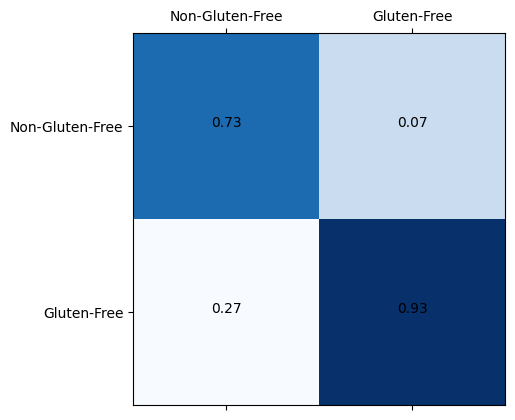


for RandomForestClassifier:
Training Accuracy:	 0.647887323943662
Test  Accuracy:	 0.6206896551724138


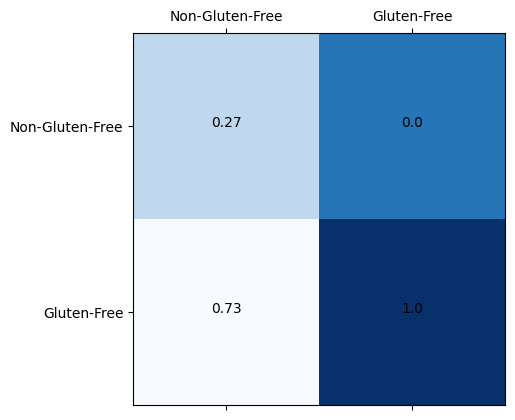


for LinearSVC:
Training Accuracy:	 1.0
Test  Accuracy:	 0.8620689655172413


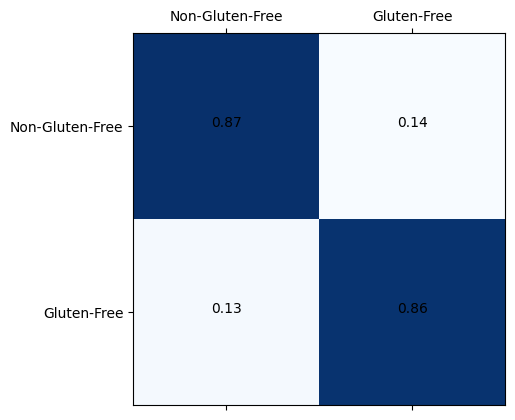


for KNeighborsClassifier:
Training Accuracy:	 0.7464788732394366
Test  Accuracy:	 0.6551724137931034


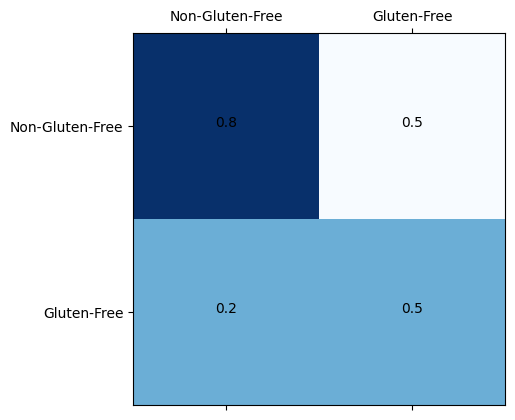

In [95]:
ytp_1 = model_1.predict(x_train_CV)
ysp_1 = model_1.predict(x_test_CV)

train_accuracy_1 = np.mean(ytp_1==y_train)
test_accuracy_1  = np.mean(ysp_1==y_test)

print('for LogisticRegression:')
print('Training Accuracy:\t',train_accuracy_1)
print('Test  Accuracy:\t',test_accuracy_1)

Ac = np.mean(ysp_1[y_test.astype(int)==0]==0)
Ar = np.mean(ysp_1[y_test.astype(int)==1]==1)

Mc = np.mean(ysp_1[y_test.astype(int)==0]==1)
Mr = np.mean(ysp_1[y_test.astype(int)==1]==0)

CM_1 = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM_1)

print("")

ytp_2 = model_2.predict(x_train_CV)
ysp_2 = model_2.predict(x_test_CV)

train_accuracy_2 = np.mean(ytp_2==y_train)
test_accuracy_2  = np.mean(ysp_2==y_test)

print('for RandomForestClassifier:')
print('Training Accuracy:\t',train_accuracy_2)
print('Test  Accuracy:\t',test_accuracy_2)

Ac = np.mean(ysp_2[y_test.astype(int)==0]==0)
Ar = np.mean(ysp_2[y_test.astype(int)==1]==1)

Mc = np.mean(ysp_2[y_test.astype(int)==0]==1)
Mr = np.mean(ysp_2[y_test.astype(int)==1]==0)

CM_2 = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM_2)

print("")

ytp_3 = model_3.predict(x_train_CV)
ysp_3 = model_3.predict(x_test_CV)

train_accuracy_3 = np.mean(ytp_3==y_train)
test_accuracy_3  = np.mean(ysp_3==y_test)

print('for LinearSVC:')
print('Training Accuracy:\t',train_accuracy_3)
print('Test  Accuracy:\t',test_accuracy_3)

Ac = np.mean(ysp_3[y_test.astype(int)==0]==0)
Ar = np.mean(ysp_3[y_test.astype(int)==1]==1)

Mc = np.mean(ysp_3[y_test.astype(int)==0]==1)
Mr = np.mean(ysp_3[y_test.astype(int)==1]==0)

CM_3 = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM_3)

print("")

ytp_4 = model_4.predict(x_train_CV)
ysp_4 = model_4.predict(x_test_CV)

train_accuracy_4 = np.mean(ytp_4==y_train)
test_accuracy_4  = np.mean(ysp_4==y_test)

print('for KNeighborsClassifier:')
print('Training Accuracy:\t',train_accuracy_4)
print('Test  Accuracy:\t',test_accuracy_4)

Ac = np.mean(ysp_4[y_test.astype(int)==0]==0)
Ar = np.mean(ysp_4[y_test.astype(int)==1]==1)

Mc = np.mean(ysp_4[y_test.astype(int)==0]==1)
Mr = np.mean(ysp_4[y_test.astype(int)==1]==0)

CM_4 = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM_4)


# 9 Conclusions

From this, we can conclude that using text processing, binary classification can be done to solve our problem statement. Further improvements can be made, such as using a larger dataset and Deep Learning models to further capture complex patterns in the data. To understand gluten-free and gluten ingredients better, further research can be done on them or by consulting an expert to accurately preprocess data and select features.